# Prediction of Stock Prices Using Regression Models

In [320]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import mean_squared_error
from math import sqrt

# Data Preprocessing

In [196]:
dataset = pd.read_csv('temp.csv')
y = dataset.iloc[:, 10].values

In [197]:
dataset.head(7)

,Open,High,Low,Close,Volume,DateIdx,momt,ROC,williams,Strength,ClsNext
0,4.125000,4.125000,4.000000,4.015625,1077600,2,-0.109375,-2.651515,0.0,28.176796,4.000000
1,4.000000,4.031250,3.953125,4.000000,437200,3,-0.015625,-0.389105,0.0,27.419355,3.843750
2,4.000000,4.000000,3.843750,3.843750,1883600,4,-0.156250,-3.906250,0.0,22.580282,3.390625
3,3.734375,3.734375,3.390625,3.390625,7931600,5,-0.453125,-11.788618,100.0,27.256457,3.437500
4,3.500000,3.703125,3.437500,3.437500,11486800,6,0.046875,1.382488,100.0,60.870225,3.500000
5,3.531250,3.578125,3.093750,3.500000,13136800,7,0.062500,1.818182,90.0,59.091174,3.484375
6,3.468750,3.562500,3.453125,3.484375,6349600,8,-0.015625,-0.446429,100.0,60.526611,3.578125


In [198]:
dataset.drop(dataset.columns[[5,10]], axis=1, inplace=True) # drop column DateIdx
dataset.head()

,Open,High,Low,Close,Volume,momt,ROC,williams,Strength
0,4.125000,4.125000,4.000000,4.015625,1077600,-0.109375,-2.651515,0.0,28.176796
1,4.000000,4.031250,3.953125,4.000000,437200,-0.015625,-0.389105,0.0,27.419355
2,4.000000,4.000000,3.843750,3.843750,1883600,-0.156250,-3.906250,0.0,22.580282
3,3.734375,3.734375,3.390625,3.390625,7931600,-0.453125,-11.788618,100.0,27.256457
4,3.500000,3.703125,3.437500,3.437500,11486800,0.046875,1.382488,100.0,60.870225


In [199]:
X = dataset.iloc[:, :].values
X

array([[  4.12500000e+00,   4.12500000e+00,   4.00000000e+00, ...,
         -2.65151515e+00,   0.00000000e+00,   2.81767956e+01],
       [  4.00000000e+00,   4.03125000e+00,   3.95312500e+00, ...,
         -3.89105058e-01,   0.00000000e+00,   2.74193548e+01],
       [  4.00000000e+00,   4.00000000e+00,   3.84375000e+00, ...,
         -3.90625000e+00,   0.00000000e+00,   2.25802819e+01],
       ..., 
       [  1.14050003e+02,   1.15089996e+02,   1.13800003e+02, ...,
          0.00000000e+00,   0.00000000e+00,   3.91256964e+01],
       [  1.14000000e+02,   1.14000000e+02,   1.12470001e+02, ...,
         -1.32201189e+00,   5.00002105e+01,   3.55696624e+01],
       [  1.12769997e+02,   1.13459999e+02,   1.12070000e+02, ...,
          3.54901960e-02,   4.78948970e+01,   3.89867065e+01]])

Feature Scaling

In [200]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X) 
y = sc_y.fit_transform(y.reshape(-1,1))

In [201]:
X

array([[-0.88414087, -0.88641929, -0.88640786, ..., -1.30623977,
        -1.51100982, -1.66436173],
       [-0.88835037, -0.88954529, -0.88800249, ..., -0.23149803,
        -1.51100982, -1.71720728],
       [-0.88835037, -0.89058729, -0.89172329, ..., -1.9022926 ,
        -1.51100982, -2.05482246],
       ..., 
       [ 2.81769382,  2.81359729,  2.84885497, ..., -0.04665645,
        -1.51100982, -0.90047262],
       [ 2.81600991,  2.77725247,  2.80360992, ..., -0.67466875,
        -0.17285862, -1.14857201],
       [ 2.77458833,  2.75924668,  2.79000237, ..., -0.02979709,
        -0.22920294, -0.91016974]])

In [202]:
y

array([[-0.88909693],
       [-0.89435639],
       [-0.90960882],
       ..., 
       [ 2.77014079],
       [ 2.77148724],
       [ 2.73816337]])

Split the dataset into Training set and Test set

In [42]:
from sklearn.cross_validation import train_test_split

C:\Users\Shimeng Lin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Multiple Linear Regression

Fit Multiple Linear Regression to the Training set

In [204]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [205]:
y_pred_ml = regressor.predict(X_train)

Build the Optimal Model Using Backward Elimination

In [206]:
X_train.shape

(3503, 9)

In [211]:
import statsmodels.formula.api as sm
X_train_ml = np.append(arr = np.ones((3503, 1)).astype(int), values = X_train, axis = 1)
X_opt = X_train_ml[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]] # 9 explanatory variables and add one constant column

regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.385e+05
Date:                Mon, 27 Nov 2017   Prob (F-statistic):               0.00
Time:                        17:51:15   Log-Likelihood:                 7687.9
No. Observations:                3503   AIC:                        -1.536e+04
Df Residuals:                    3493   BIC:                        -1.529e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.242      0.809      -0.001       0.001
x1             0.0963      0.060      1.609      0.108      -0.021       0.214
x2            -0.2014      0.058     -3.463      0.001      -0.315      -0.087
x3            -0.1462      0.056     -2.614      0.009      -0.256      -0.037
x4             1.2511      0.061     20.672      0.000       1.132       1.370
x5             0.0001      0.001      0.194      0.846      -0.001       0.001
x6            -0.0006      0.001     -0.669      0.503      -0.003       0.001
x7            -0.0002      0.001     -0.330      0.742      -0.001       0.001
x8             0.0091      0.001     16.574      0.000       0.008       0.010
x9            -0.0003      0.001     -0.542      0.588      -0.001       0.001
==============================================================================
Omnibus:                     2341.862   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2816747.740
Skew:                          -1.701   Prob(JB):                         0.00
Kurtosis:                     141.877   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [212]:
X_opt = X_train_ml[:, [0, 1, 2, 3, 4, 6, 7, 8, 9]] # eliminate volumn; threshold = 0.05

In [213]:
regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.060e+05
Date:                Mon, 27 Nov 2017   Prob (F-statistic):               0.00
Time:                        17:51:56   Log-Likelihood:                 7687.9
No. Observations:                3503   AIC:                        -1.536e+04
Df Residuals:                    3494   BIC:                        -1.530e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.240      0.810      -0.001       0.001
x1             0.0954      0.060      1.599      0.110      -0.022       0.212
x2            -0.1985      0.056     -3.534      0.000      -0.309      -0.088
x3            -0.1490      0.054     -2.753      0.006      -0.255      -0.043
x4             1.2517      0.060     20.716      0.000       1.133       1.370
x5            -0.0007      0.001     -0.685      0.493      -0.003       0.001
x6            -0.0002      0.001     -0.351      0.726      -0.001       0.001
x7             0.0091      0.001     16.579      0.000       0.008       0.010
x8            -0.0003      0.001     -0.539      0.590      -0.001       0.001
==============================================================================
Omnibus:                     2341.395   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2814883.392
Skew:                          -1.701   Prob(JB):                         0.00
Kurtosis:                     141.831   Cond. No.                         409.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [214]:
X_opt = X_train_ml[:, [1, 2, 3, 4, 6, 7, 8, 9]] # further eliminate constant
regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.062e+05
Date:                Mon, 27 Nov 2017   Prob (F-statistic):               0.00
Time:                        17:52:29   Log-Likelihood:                 7687.9
No. Observations:                3503   AIC:                        -1.536e+04
Df Residuals:                    3495   BIC:                        -1.531e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0956      0.060      1.602      0.109      -0.021       0.213
x2            -0.1986      0.056     -3.538      0.000      -0.309      -0.089
x3            -0.1489      0.054     -2.753      0.006      -0.255      -0.043
x4             1.2517      0.060     20.718      0.000       1.133       1.370
x5            -0.0006      0.001     -0.684      0.494      -0.003       0.001
x6            -0.0002      0.001     -0.352      0.725      -0.001       0.001
x7             0.0091      0.001     16.583      0.000       0.008       0.010
x8            -0.0003      0.001     -0.541      0.589      -0.001       0.001
==============================================================================
Omnibus:                     2341.459   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2815076.484
Skew:                          -1.701   Prob(JB):                         0.00
Kurtosis:                     141.835   Cond. No.                         409.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [215]:
X_opt = X_train_ml[:, [2, 3, 4, 6, 7, 8, 9]] # further eliminate Open
regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.925e+05
Date:                Mon, 27 Nov 2017   Prob (F-statistic):               0.00
Time:                        17:53:25   Log-Likelihood:                 7686.6
No. Observations:                3503   AIC:                        -1.536e+04
Df Residuals:                    3496   BIC:                        -1.532e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1354      0.040     -3.390      0.001      -0.214      -0.057
x2            -0.0975      0.044     -2.239      0.025      -0.183      -0.012
x3             1.2326      0.059     20.805      0.000       1.116       1.349
x4            -0.0013      0.001     -1.598      0.110      -0.003       0.000
x5            -0.0002      0.001     -0.377      0.706      -0.001       0.001
x6             0.0091      0.001     16.532      0.000       0.008       0.010
x7            -0.0003      0.001     -0.505      0.614      -0.001       0.001
==============================================================================
Omnibus:                     2323.349   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2787044.015
Skew:                          -1.674   Prob(JB):                         0.00
Kurtosis:                     141.143   Cond. No.                         277.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [216]:
X_opt = X_train_ml[:, [2, 3, 4, 7, 8, 9]] # further eliminate moment
regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.076e+05
Date:                Mon, 27 Nov 2017   Prob (F-statistic):               0.00
Time:                        17:55:40   Log-Likelihood:                 7685.3
No. Observations:                3503   AIC:                        -1.536e+04
Df Residuals:                    3497   BIC:                        -1.532e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1107      0.037     -3.005      0.003      -0.183      -0.038
x2            -0.0698      0.040     -1.747      0.081      -0.148       0.009
x3             1.1803      0.049     23.908      0.000       1.083       1.277
x4            -0.0008      0.001     -1.505      0.132      -0.002       0.000
x5             0.0091      0.001     16.566      0.000       0.008       0.010
x6            -0.0003      0.001     -0.572      0.568      -0.001       0.001
==============================================================================
Omnibus:                     2291.188   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2742871.607
Skew:                          -1.625   Prob(JB):                         0.00
Kurtosis:                     140.046   Cond. No.                         231.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [217]:
X_opt = X_train_ml[:, [2, 3, 4, 8, 9]] # further eliminate ROC
regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.687e+05
Date:                Mon, 27 Nov 2017   Prob (F-statistic):               0.00
Time:                        17:56:22   Log-Likelihood:                 7684.2
No. Observations:                3503   AIC:                        -1.536e+04
Df Residuals:                    3498   BIC:                        -1.533e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0959      0.036     -2.700      0.007      -0.165      -0.026
x2            -0.0505      0.038     -1.334      0.182      -0.125       0.024
x3             1.1460      0.044     26.147      0.000       1.060       1.232
x4             0.0092      0.001     16.948      0.000       0.008       0.010
x5            -0.0005      0.001     -0.909      0.364      -0.002       0.001
==============================================================================
Omnibus:                     2285.390   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2771319.759
Skew:                          -1.614   Prob(JB):                         0.00
Kurtosis:                     140.756   Cond. No.                         205.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [218]:
X_opt = X_train_ml[:, [2, 3, 4, 8]] # further eliminate strength
regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.211e+06
Date:                Mon, 27 Nov 2017   Prob (F-statistic):               0.00
Time:                        17:57:26   Log-Likelihood:                 7683.7
No. Observations:                3503   AIC:                        -1.536e+04
Df Residuals:                    3499   BIC:                        -1.533e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0917      0.035     -2.605      0.009      -0.161      -0.023
x2            -0.0482      0.038     -1.276      0.202      -0.122       0.026
x3             1.1396      0.043     26.347      0.000       1.055       1.224
x4             0.0089      0.000     19.566      0.000       0.008       0.010
==============================================================================
Omnibus:                     2283.439   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2752017.034
Skew:                          -1.612   Prob(JB):                         0.00
Kurtosis:                     140.275   Cond. No.                         203.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [220]:
X_opt = X_train_ml[:, [2, 3, 8]] # further eliminate low
regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.348e+06
Date:                Mon, 27 Nov 2017   Prob (F-statistic):               0.00
Time:                        17:58:38   Log-Likelihood:                 7366.8
No. Observations:                3503   AIC:                        -1.473e+04
Df Residuals:                    3500   BIC:                        -1.471e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4212      0.032     13.112      0.000       0.358       0.484
x2             0.5785      0.032     18.017      0.000       0.516       0.641
x3             0.0086      0.000     17.239      0.000       0.008       0.010
==============================================================================
Omnibus:                     2150.989   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2763158.237
Skew:                          -1.400   Prob(JB):                         0.00
Kurtosis:                     140.562   Cond. No.                         129.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The most useful indicators are High, Close and Williams.

In [292]:
# predictions on training set
y_pred_OLS_train = regressor_OLS.predict(X_opt) 
y_pred_OLS_train

array([ 0.62203227, -0.83939018, -0.7760192 , ..., -0.6602591 ,
       -0.05483845,  0.44396071])

In [293]:
X_test.shape

(876, 9)

In [295]:
# predictions on test set
X_test_ml = np.append(arr = np.ones((876, 1)).astype(int), values = X_test, axis = 1)
X_opt_test = X_test_ml[:, [2, 3, 8]] 

y_pred_OLS_test = regressor_OLS.predict(X_opt_test) 

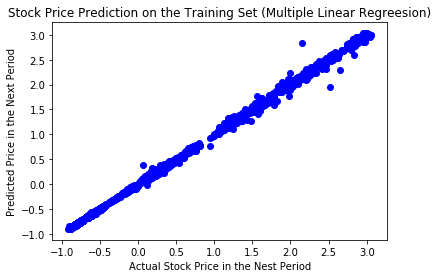

In [296]:
# training
plt.scatter(y_train, y_pred_OLS_train, color = 'blue')
plt.title('Stock Price Prediction on the Training Set (Multiple Linear Regreesion)')
plt.xlabel('Actual Stock Price in the Nest Period')
plt.ylabel('Predicted Price in the Next Period')
plt.show()

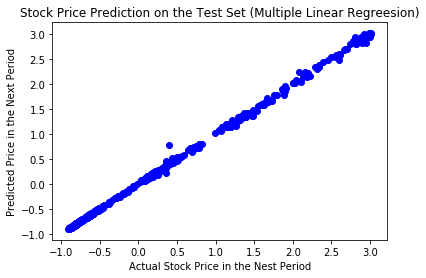

In [297]:
# training
plt.scatter(y_test, y_pred_OLS_test, color = 'blue')
plt.title('Stock Price Prediction on the Test Set (Multiple Linear Regreesion)')
plt.xlabel('Actual Stock Price in the Nest Period')
plt.ylabel('Predicted Price in the Next Period')
plt.show()

In [300]:
# r^2
from sklearn.metrics import r2_score

In [301]:
r2_score(y_train, y_pred_OLS_train)

0.99913491788014386

In [302]:
r2_score(y_test, y_pred_OLS_test)

0.99928992682705198

# Polynomial Regression

In [52]:
from sklearn.preprocessing import PolynomialFeatures

degress = 2

In [223]:
poly_reg_2 = PolynomialFeatures(degree = 2) 
X_poly_2 = poly_reg_2.fit_transform(X_train) # transform X_train
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_2, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [254]:
# predictions on the training set
y_pred_poly_2 = lin_reg_2.predict(poly_reg_2.fit_transform(X_train)) 

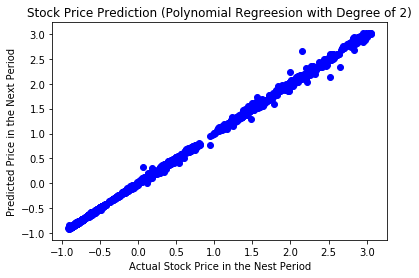

In [268]:
plt.scatter(y_train, y_pred_poly_2, color = 'blue')
plt.title('Stock Price Prediction (Polynomial Regreesion with Degree of 2)')
plt.xlabel('Actual Stock Price in the Nest Period')
plt.ylabel('Predicted Price in the Next Period')
plt.show()

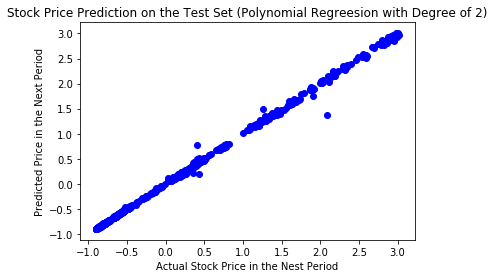

In [269]:
# predictions on the test set
y_pred_poly_2_test = lin_reg_2.predict(poly_reg_2.fit_transform(X_test)) 

plt.scatter(y_test, y_pred_poly_2_test, color = 'blue')
plt.title('Stock Price Prediction on the Test Set (Polynomial Regreesion with Degree of 2)')
plt.xlabel('Actual Stock Price in the Nest Period')
plt.ylabel('Predicted Price in the Next Period')
plt.show()

In [305]:
# r^2
r2_score(y_train, y_pred_poly_2)

0.99940045909612474

In [304]:
r2_score(y_test, y_pred_poly_2_test)

0.99873585342309146

degree = 3

In [256]:
poly_reg_3 = PolynomialFeatures(degree = 3) 
X_poly_3 = poly_reg_3.fit_transform(X_train) 
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly_3, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [257]:
y_pred_poly_3 = lin_reg_3.predict(poly_reg_3.fit_transform(X_train)) 

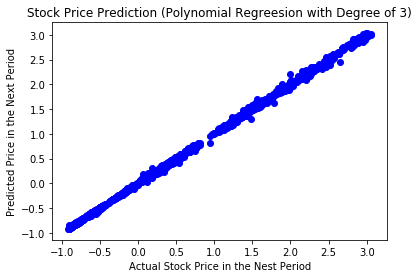

In [270]:
plt.scatter(y_train, y_pred_poly_3, color = 'blue')
plt.title('Stock Price Prediction (Polynomial Regreesion with Degree of 3)')
plt.xlabel('Actual Stock Price in the Nest Period')
plt.ylabel('Predicted Price in the Next Period')
plt.show()

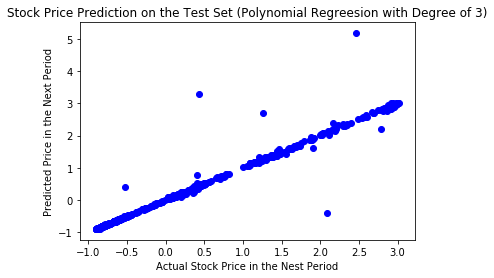

In [271]:
# predictions on the test set
y_pred_poly_3_test = lin_reg_3.predict(poly_reg_3.fit_transform(X_test)) 

plt.scatter(y_test, y_pred_poly_3_test, color = 'blue')
plt.title('Stock Price Prediction on the Test Set (Polynomial Regreesion with Degree of 3)')
plt.xlabel('Actual Stock Price in the Nest Period')
plt.ylabel('Predicted Price in the Next Period')
plt.show()

In [306]:
r2_score(y_train, y_pred_poly_3)

0.99961523078563075

In [307]:
r2_score(y_test, y_pred_poly_3_test)

0.96940948590301634

degree = 4 

In [229]:
poly_reg_4 = PolynomialFeatures(degree = 4) 
X_poly_4 = poly_reg_4.fit_transform(X_train) 
lin_reg_4 = LinearRegression()
lin_reg_4.fit(X_poly_4, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [259]:
y_pred_poly_4 = lin_reg_4.predict(poly_reg_4.fit_transform(X_train)) 

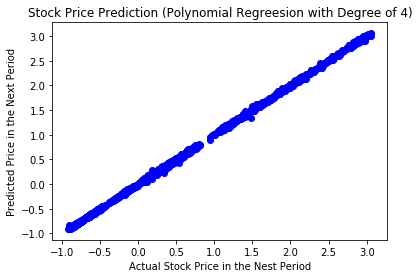

In [272]:
plt.scatter(y_train, y_pred_poly_4, color = 'blue')
plt.title('Stock Price Prediction (Polynomial Regreesion with Degree of 4)')
plt.xlabel('Actual Stock Price in the Nest Period')
plt.ylabel('Predicted Price in the Next Period')
plt.show()

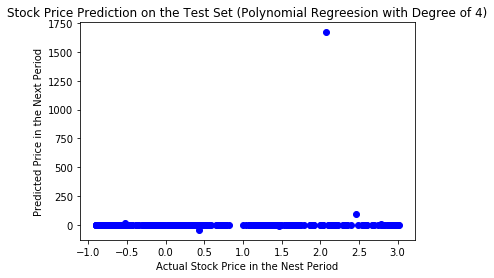

In [273]:
# predictions on the test set
y_pred_poly_4_test = lin_reg_4.predict(poly_reg_4.fit_transform(X_test)) 

plt.scatter(y_test, y_pred_poly_4_test, color = 'blue')
plt.title('Stock Price Prediction on the Test Set (Polynomial Regreesion with Degree of 4)')
plt.xlabel('Actual Stock Price in the Nest Period')
plt.ylabel('Predicted Price in the Next Period')
plt.show()

The optimal degree is 2.

In [308]:
r2_score(y_train, y_pred_poly_4)

0.999818182813766

In [311]:
r2_score(y_test, y_pred_poly_4_test)

-3307.7420629585572

# Support Vector Regression

In [264]:
from sklearn.svm import SVR

In [281]:
regressor_SVR = SVR(kernel = 'rbf')

In [282]:
regressor_SVR.fit(X_train, y_train)

C:\Users\Shimeng Lin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

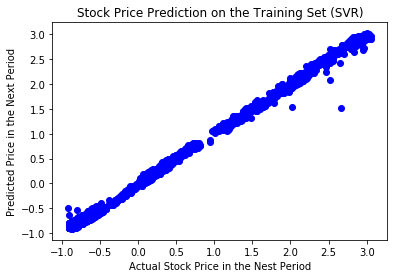

In [286]:
plt.scatter(y_train, regressor_SVR.predict(X_train), color = 'blue')
plt.title('Stock Price Prediction on the Training Set (SVR)')
plt.xlabel('Actual Stock Price in the Nest Period')
plt.ylabel('Predicted Price in the Next Period')
plt.show()

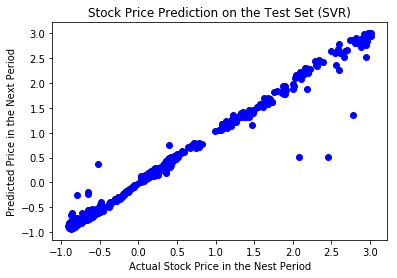

In [287]:
plt.scatter(y_test, regressor_SVR.predict(X_test), color = 'blue')
plt.title('Stock Price Prediction on the Test Set (SVR)')
plt.xlabel('Actual Stock Price in the Nest Period')
plt.ylabel('Predicted Price in the Next Period')
plt.show()

In [312]:
r2_score(y_train, regressor_SVR.predict(X_train))

0.99675826022206715

In [313]:
r2_score(y_test, regressor_SVR.predict(X_test))

0.9846449564581462

# Random Forest Regression

In [135]:
from sklearn.ensemble import RandomForestRegressor 

The number of trees = 10

In [232]:
regressor_rf = RandomForestRegressor(n_estimators = 10, random_state = 0) 
regressor_rf.fit(X_train, y_train)

C:\Users\Shimeng Lin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [237]:
# predictions on training set
y_pred_rf_train = regressor_rf.predict(X_train) 

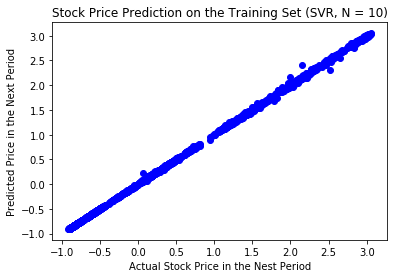

In [274]:
plt.scatter(y_train, regressor_rf.predict(X_train), color = 'blue')
plt.title('Stock Price Prediction on the Training Set (SVR, N = 10)')
plt.xlabel('Actual Stock Price in the Nest Period')
plt.ylabel('Predicted Price in the Next Period')
plt.show()

In [235]:
# predictions on test set
y_pred_rf_test = regressor_rf.predict(X_test) 

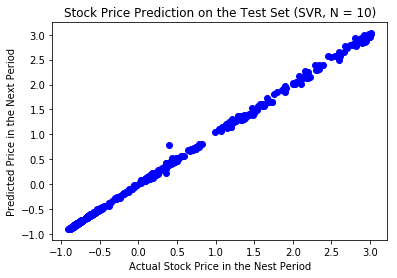

In [275]:
plt.scatter(y_test, regressor_rf.predict(X_test), color = 'blue')
plt.title('Stock Price Prediction on the Test Set (SVR, N = 10)')
plt.xlabel('Actual Stock Price in the Nest Period')
plt.ylabel('Predicted Price in the Next Period')
plt.show()

In [314]:
r2_score(y_train, y_pred_rf_train)

0.99984723838397338

In [315]:
r2_score(y_test, y_pred_rf_test)

0.99929178120250917

The number of trees = 100

In [241]:
regressor_rf_100 = RandomForestRegressor(n_estimators = 100, random_state = 0) 
regressor_rf_100.fit(X_train, y_train)

C:\Users\Shimeng Lin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [242]:
# predictions on training set
y_pred_rf100_train = regressor_rf_100.predict(X_train) 

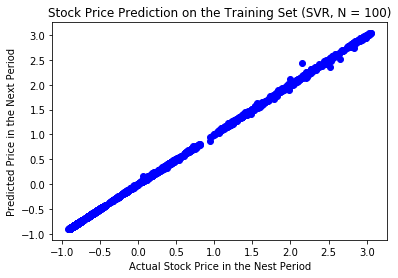

In [276]:
plt.scatter(y_train, regressor_rf_100.predict(X_train), color = 'blue')
plt.title('Stock Price Prediction on the Training Set (SVR, N = 100)')
plt.xlabel('Actual Stock Price in the Nest Period')
plt.ylabel('Predicted Price in the Next Period')
plt.show()

In [246]:
# predictions on test set
y_pred_rf100_test = regressor_rf_100.predict(X_test) 

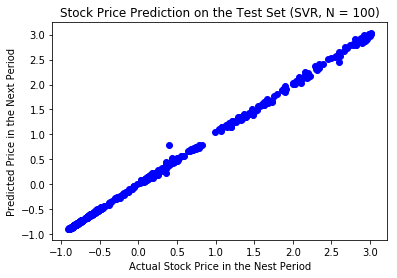

In [277]:
plt.scatter(y_test, regressor_rf_100.predict(X_test), color = 'blue')
plt.title('Stock Price Prediction on the Test Set (SVR, N = 100)')
plt.xlabel('Actual Stock Price in the Nest Period')
plt.ylabel('Predicted Price in the Next Period')
plt.show()

In [316]:
r2_score(y_train, y_pred_rf100_train)

0.99987546214452161

In [317]:
r2_score(y_test, y_pred_rf100_test)

0.99938670611129776

The number of trees = 300

In [248]:
regressor_rf_300 = RandomForestRegressor(n_estimators = 300, random_state = 0) 
regressor_rf_300.fit(X_train, y_train)

C:\Users\Shimeng Lin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [249]:
# predictions on training set
y_pred_rf300_train = regressor_rf_300.predict(X_train) 

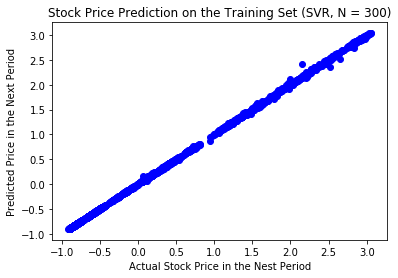

In [278]:
plt.scatter(y_train, regressor_rf_300.predict(X_train), color = 'blue')
plt.title('Stock Price Prediction on the Training Set (SVR, N = 300)')
plt.xlabel('Actual Stock Price in the Nest Period')
plt.ylabel('Predicted Price in the Next Period')
plt.show()

In [251]:
# predictions on test set
y_pred_rf300_test = regressor_rf_300.predict(X_test) 

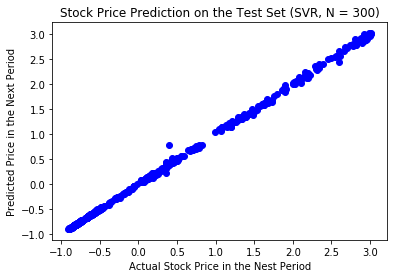

In [279]:
plt.scatter(y_test, regressor_rf_300.predict(X_test), color = 'blue')
plt.title('Stock Price Prediction on the Test Set (SVR, N = 300)')
plt.xlabel('Actual Stock Price in the Nest Period')
plt.ylabel('Predicted Price in the Next Period')
plt.show()

In [318]:
r2_score(y_train, y_pred_rf100_train)

0.99988431179751858

In [319]:
r2_score(y_test, y_pred_rf300_test)

0.99938564005985353

In [321]:
# rms: Mean Squared Error
sqrt(mean_squared_error(y_train, y_pred_rf100_train))

0.011209035761269855

In [322]:
sqrt(mean_squared_error(y_test, y_pred_rf300_test))

0.02432744614432298